# A simple numerical example of PCA:

In [23]:
import numpy as np
from numpy.linalg import svd
np.set_printoptions(precision=2)

## Step 0: Generating a sample matrix

In [24]:
X = np.array([[1, 1, 1, 0, 0], 
              [2, 2, 2, 0, 0], 
              [1, 1, 1, 0, 0], 
              [5, 5, 5, 0, 0], 
              [1, 1, 0, 2, 2], 
              [0, 0, 0, 3, 3], 
              [0, 0, 0, 1, 1]], dtype=np.float32)


## Step1: Zero-centering data

In [33]:
mu = np.mean(X, 0)
X_norm = X - mu
print('mu = ', mu)
print('X_norm =')
print(X_norm)

mu =  [1.43 1.43 1.29 0.86 0.86]
X_norm =
[[-0.43 -0.43 -0.29 -0.86 -0.86]
 [ 0.57  0.57  0.71 -0.86 -0.86]
 [-0.43 -0.43 -0.29 -0.86 -0.86]
 [ 3.57  3.57  3.71 -0.86 -0.86]
 [-0.43 -0.43 -1.29  1.14  1.14]
 [-1.43 -1.43 -1.29  2.14  2.14]
 [-1.43 -1.43 -1.29  0.14  0.14]]


## Step2: computing sigma (covariance matrix)

In [34]:
m = X_norm.shape[0]
sigma = (X_norm.T @ X_norm) / m
print('sigma =')
print(sigma)

sigma =
[[ 2.53  2.53  2.59 -0.94 -0.94]
 [ 2.53  2.53  2.59 -0.94 -0.94]
 [ 2.59  2.59  2.78 -1.1  -1.1 ]
 [-0.94 -0.94 -1.1   1.27  1.27]
 [-0.94 -0.94 -1.1   1.27  1.27]]


## Step3: computing SVD

In [35]:
U, S, V = svd(sigma)
print ('U : ')
print (U)
print ('S : ')
print (S)

U : 
[[-5.27e-01 -2.45e-01  4.02e-01 -7.07e-01 -7.03e-17]
 [-5.27e-01 -2.45e-01  4.02e-01  7.07e-01  3.88e-17]
 [-5.56e-01 -1.46e-01 -8.18e-01  6.91e-15 -7.46e-19]
 [ 2.59e-01 -6.55e-01 -5.94e-02  6.75e-16 -7.07e-01]
 [ 2.59e-01 -6.55e-01 -5.94e-02  5.64e-16  7.07e-01]]
S : 
[8.72e+00 1.58e+00 6.69e-02 2.24e-16 0.00e+00]


## Step4: Project data

In [36]:
X_proj = X_norm @ U[:, 3]
print (X_proj)

[-3.04e-15  3.87e-15 -3.04e-15  2.46e-14 -7.46e-15 -6.22e-15 -8.70e-15]


## This is the whole process in a madule:

In [38]:
def PCA(X, k=3):
    """ 
    Arguments:
        - X: data matrix - numpy array of shape (m, n)
        - k: number of components
        
    Returns:
       - Projection of X into a k-d space of principal components
    
    """
    m = X.shape[0]
    
    Xn = X - X.mean(axis=0)   # STEP 1: zero-center data (remove mean)          
    Sigma = (Xn.T @ Xn) / m   # STEP 2: compute covariance matrix
    U, S, VT = svd(Sigma)     # STEP 3: Singular Value Decomposition
    print ('U : ')
    print (U)
    print ('S : ')
    print (S)
    print ('Proj of X on U:')
    X_proj = Xn @ U[:, :k]    # project data on U
    return X_proj

In [39]:
X = np.array([[1, 1, 1, 0, 0], 
              [2, 2, 2, 0, 0], 
              [1, 1, 1, 0, 0], 
              [5, 5, 5, 0, 0], 
              [1, 1, 0, 2, 2], 
              [0, 0, 0, 3, 3], 
              [0, 0, 0, 1, 1]], dtype=np.float32)


print (PCA(X, 3))

U : 
[[-5.27e-01 -2.45e-01  4.02e-01 -7.07e-01 -7.03e-17]
 [-5.27e-01 -2.45e-01  4.02e-01  7.07e-01  3.88e-17]
 [-5.56e-01 -1.46e-01 -8.18e-01  6.91e-15 -7.46e-19]
 [ 2.59e-01 -6.55e-01 -5.94e-02  6.75e-16 -7.07e-01]
 [ 2.59e-01 -6.55e-01 -5.94e-02  5.64e-16  7.07e-01]]
S : 
[8.72e+00 1.58e+00 6.69e-02 2.24e-16 0.00e+00]
Proj of X on U:
[[ 0.17  1.37 -0.01]
 [-1.44  0.74 -0.02]
 [ 0.17  1.37 -0.01]
 [-6.28 -1.17 -0.06]
 [ 1.76 -1.1   0.57]
 [ 3.33 -1.92 -0.35]
 [ 2.3   0.7  -0.11]]


## Using the PCA module in sklearn

In [40]:
from sklearn.decomposition import PCA
X = np.array([[1, 1, 1, 0, 0], 
              [2, 2, 2, 0, 0], 
              [1, 1, 1, 0, 0], 
              [5, 5, 5, 0, 0], 
              [1, 1, 0, 2, 2], 
              [0, 0, 0, 3, 3], 
              [0, 0, 0, 1, 1]], dtype=np.float32)
pca = PCA(n_components=3)
pca.fit(X)
U = pca.components_
S = pca.explained_variance_
print(U)
print(S)
projX = pca.fit_transform(X)
print(projX)

pca_acc = PCA(0.80) #Keep 80% of informaion
projX = pca_acc.fit_transform(X)
print(projX)

[[ 0.53  0.53  0.56 -0.26 -0.26]
 [ 0.25  0.25  0.15  0.66  0.66]
 [ 0.4   0.4  -0.82 -0.06 -0.06]]
[10.17  1.85  0.08]
[[-0.17 -1.37 -0.01]
 [ 1.44 -0.74 -0.02]
 [-0.17 -1.37 -0.01]
 [ 6.28  1.17 -0.06]
 [-1.76  1.1   0.57]
 [-3.33  1.92 -0.35]
 [-2.3  -0.7  -0.11]]
[[-0.17]
 [ 1.44]
 [-0.17]
 [ 6.28]
 [-1.76]
 [-3.33]
 [-2.3 ]]


## let's work with Digit data set (sklearn data set: 64*64 aray for each digit)

In [42]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Showing digits in 2 dimensional (project data from 64 to 2)

In [43]:
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)

### Plotting our projection

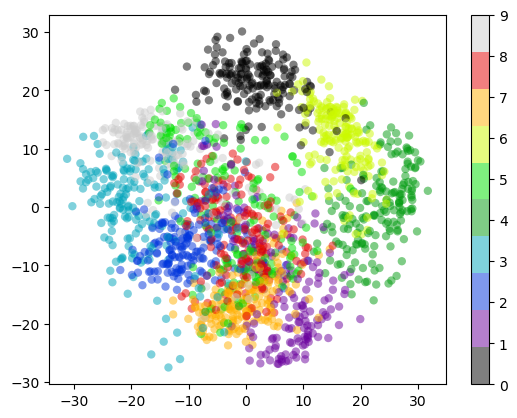

In [44]:
import matplotlib.pyplot as plt
plt.scatter(X_proj[:, 0], X_proj[:, 1], 
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

## Now working with mnist.pickle (5000 of 28*28 Images)

In [61]:
import gzip, pickle

DATA_PATH = 'data/mnist.pkl.gz'

#deserializing of mnist data set
with gzip.open(DATA_PATH, 'rb') as f:
    (X, y), _, _ = pickle.load(f, encoding='latin1')

print('Training data shape:    ', X.shape)
print('Training labels shape:  ', y.shape)

Training data shape:     (50000, 784)
Training labels shape:   (50000,)


## Using PCA as a data compressor and visually demonstrating the loss of data  

In [63]:
from ipywidgets import interact

def plot_digits(n_components, digit):
    fig = plt.figure(figsize=(16, 8))
    
    pca = PCA(n_components).fit(X)

    for i in range (5000):
        if y[i] == digit:
            X_proj = pca.inverse_transform(pca.transform(X[i:i+1])) #projecting and re-projecting of Data to measure level of error
            X_proj = np.reshape(X_proj, ( 28, 28))
            total_var = pca.explained_variance_ratio_.sum()
            plt.subplot(121)                
            plt.imshow(X_proj, cmap='binary')
            plt.title("k = {0}, variance = {1:.2f}".format(n_components, total_var), size=18)
            plt.axis('off')
            plt.clim(0, 1)
    
            plt.subplot(122)
            X_org = X[i:i+1].reshape((28, 28))
            plt.imshow(X_org, cmap='binary')
            plt.title("Original Data", size=18)
            plt.axis('off')
            break
    

interact(plot_digits, n_components=[10, 20, 30, 40, 50, 100, 150, 200, 784], digit=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]);

interactive(children=(Dropdown(description='n_components', options=(10, 20, 30, 40, 50, 100, 150, 200, 784), v…

## Now let's work with olivetti_faces dataset

In [64]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
X, y = faces['data'], faces['target']
print(X.shape)
#print(y)

(400, 4096)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32

In [78]:
# select 100 faces randomly
def plot_all_faces(no_comp):
    X_samples = (X)[:50]
    pca = PCA(no_comp).fit(X)
    X_proj = pca.inverse_transform(pca.transform(X[:50]))

    fig, axes = plt.subplots(10, 10, figsize=(12, 12))
    fig.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8, hspace=0.1, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        if i < 50:
            ax.imshow(X_samples[i].reshape((64, 64)), cmap='gray')
            ax.set_xticks(())
            ax.set_yticks(())
        if i >= 50:
            ax.imshow(X_proj[i-50].reshape((64, 64)), cmap='gray')
            ax.set_xticks(())
            ax.set_yticks(())
    plt.show()

interact(plot_all_faces,no_comp=[10, 50, 100, 200, 400])

interactive(children=(Dropdown(description='no_comp', options=(10, 50, 100, 200, 400), value=10), Output()), _…

<function __main__.plot_all_faces(no_comp)>

In [80]:

def plot_a_face(n_components, person_id):
    fig = plt.figure(figsize=(4, 2))
    
    pca = PCA(n_components).fit(X)

    for i in range (400):
        if y[i] == person_id:
            X_proj = pca.inverse_transform(pca.transform(X[i:i+1])) #projecting and re-projecting of Data to measure level of error
            X_proj = np.reshape(X_proj, ( 64, 64))
            total_var = pca.explained_variance_ratio_.sum()
            plt.subplot(121)                
            plt.imshow(X_proj, cmap='gray')
            plt.title("k = {0}, variance = {1:.2f}".format(n_components, total_var), size=10)
            plt.axis('off')
            plt.clim(0, 1)
    
            plt.subplot(122)
            X_org = X[i:i+1].reshape((64, 64))
            plt.imshow(X_org, cmap='gray')
            plt.title("Original Data", size=10)
            plt.axis('off')
            #break
    

interact(plot_a_face, n_components=[100, 200, 300, 400, 1000], person_id=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 30, 39]);

interactive(children=(Dropdown(description='n_components', options=(100, 200, 300, 400, 1000), value=100), Dro…